In [3]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import plotly.express as px

##1.라이브러리 & 폰트 설정

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (41.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [6]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (12, 9)

In [7]:
#행 중간 잘리지 않게

pd.set_option('display.max_rows', None)

##2.파일 업로드

In [8]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1kJwY2WWf8Oq1RKd_w6lZ7D3jofJLdZYB', encoding='cp949')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Columns: 115 entries, 지역 to 21.Jun
dtypes: float64(114), object(1)
memory usage: 212.2+ KB


##3.데이터 전처리

In [10]:
#NaN 개수 확인

df.isna().sum()

지역        0
12.Jan    7
12.Feb    7
12.Mar    7
12.Apr    7
12.May    7
12.Jun    7
12.Jul    7
12.Aug    7
12.Sep    7
12.Oct    7
12.Nov    7
12.Dec    7
13.Jan    7
13.Feb    7
13.Mar    7
13.Apr    7
13.May    7
13.Jun    7
13.Jul    7
13.Aug    7
13.Sep    7
13.Oct    7
13.Nov    7
13.Dec    7
14.Jan    7
14.Feb    7
14.Mar    7
14.Apr    7
14.May    7
14.Jun    7
14.Jul    6
14.Aug    6
14.Sep    6
14.Oct    6
14.Nov    6
14.Dec    6
15.Jan    6
15.Feb    6
15.Mar    6
15.Apr    6
15.May    6
15.Jun    6
15.Jul    6
15.Aug    6
15.Sep    6
15.Oct    6
15.Nov    6
15.Dec    6
16.Jan    6
16.Feb    6
16.Mar    6
16.Apr    6
16.May    6
16.Jun    6
16.Jul    9
16.Aug    9
16.Sep    9
16.Oct    9
16.Nov    9
16.Dec    9
17.Jan    9
17.Feb    9
17.Mar    9
17.Apr    9
17.May    9
17.Jun    9
17.Jul    9
17.Aug    9
17.Sep    9
17.Oct    9
17.Nov    9
17.Dec    9
18.Jan    9
18.Feb    9
18.Mar    9
18.Apr    9
18.May    9
18.Jun    9
18.Jul    9
18.Aug    9
18.Sep    9
18.Oct    9
18.N

In [11]:
#NaN 행 삭제

df = df.dropna()
df.isna().sum()

지역        0
12.Jan    0
12.Feb    0
12.Mar    0
12.Apr    0
12.May    0
12.Jun    0
12.Jul    0
12.Aug    0
12.Sep    0
12.Oct    0
12.Nov    0
12.Dec    0
13.Jan    0
13.Feb    0
13.Mar    0
13.Apr    0
13.May    0
13.Jun    0
13.Jul    0
13.Aug    0
13.Sep    0
13.Oct    0
13.Nov    0
13.Dec    0
14.Jan    0
14.Feb    0
14.Mar    0
14.Apr    0
14.May    0
14.Jun    0
14.Jul    0
14.Aug    0
14.Sep    0
14.Oct    0
14.Nov    0
14.Dec    0
15.Jan    0
15.Feb    0
15.Mar    0
15.Apr    0
15.May    0
15.Jun    0
15.Jul    0
15.Aug    0
15.Sep    0
15.Oct    0
15.Nov    0
15.Dec    0
16.Jan    0
16.Feb    0
16.Mar    0
16.Apr    0
16.May    0
16.Jun    0
16.Jul    0
16.Aug    0
16.Sep    0
16.Oct    0
16.Nov    0
16.Dec    0
17.Jan    0
17.Feb    0
17.Mar    0
17.Apr    0
17.May    0
17.Jun    0
17.Jul    0
17.Aug    0
17.Sep    0
17.Oct    0
17.Nov    0
17.Dec    0
18.Jan    0
18.Feb    0
18.Mar    0
18.Apr    0
18.May    0
18.Jun    0
18.Jul    0
18.Aug    0
18.Sep    0
18.Oct    0
18.N

In [12]:
#행렬 전환

df = df.set_index('지역')
df = df.transpose()
df.head()

지역,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,서울 강북지역,서울 도심권,...,경남 진주시,경남 통영시,경남 사천시,경남 김해시,경남 밀양시,경남 거제시,경남 양산시,제주,제주 제주시,제주 서귀포시
12.Jan,264474.0,365249.0,163394.0,195186.0,190421.0,211371.0,139237.0,540954.0,405962.0,706316.0,...,157468.0,143155.0,101292.0,172711.0,105897.0,181049.0,130287.0,134994.0,145425.0,80868.0
12.Feb,264035.0,364275.0,163491.0,194989.0,190312.0,211340.0,139518.0,538876.0,405406.0,705830.0,...,157582.0,143155.0,101292.0,171124.0,105897.0,181585.0,130202.0,139424.0,150436.0,82283.0
12.Mar,263470.0,362790.0,163849.0,195093.0,190555.0,211142.0,139979.0,536079.0,404184.0,702286.0,...,159802.0,143507.0,101519.0,169589.0,105897.0,182488.0,129489.0,139830.0,150769.0,83067.0
12.Apr,262630.0,360918.0,164044.0,195037.0,190603.0,210804.0,140306.0,532409.0,402746.0,701482.0,...,159814.0,143162.0,101519.0,168874.0,105971.0,183663.0,128351.0,141365.0,152481.0,83683.0
12.May,261823.0,359253.0,164096.0,194851.0,190631.0,210270.0,140378.0,529733.0,401085.0,700462.0,...,159700.0,143207.0,101519.0,168084.0,105971.0,183272.0,127287.0,144561.0,155972.0,85350.0


In [13]:
#datetime으로 변환
#날짜를 index로

df = df.reset_index()
df['index'] = pd.to_datetime(df['index'], format='%y.%b')
df = df.rename({'index' : '날짜'}, axis=1)
df = df.set_index('날짜')
df.head()

지역,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,서울 강북지역,서울 도심권,...,경남 진주시,경남 통영시,경남 사천시,경남 김해시,경남 밀양시,경남 거제시,경남 양산시,제주,제주 제주시,제주 서귀포시
날짜,,,,,,,,,,,,,,,,,,,,,
2012-01-01,264474.0,365249.0,163394.0,195186.0,190421.0,211371.0,139237.0,540954.0,405962.0,706316.0,...,157468.0,143155.0,101292.0,172711.0,105897.0,181049.0,130287.0,134994.0,145425.0,80868.0
2012-02-01,264035.0,364275.0,163491.0,194989.0,190312.0,211340.0,139518.0,538876.0,405406.0,705830.0,...,157582.0,143155.0,101292.0,171124.0,105897.0,181585.0,130202.0,139424.0,150436.0,82283.0
2012-03-01,263470.0,362790.0,163849.0,195093.0,190555.0,211142.0,139979.0,536079.0,404184.0,702286.0,...,159802.0,143507.0,101519.0,169589.0,105897.0,182488.0,129489.0,139830.0,150769.0,83067.0
2012-04-01,262630.0,360918.0,164044.0,195037.0,190603.0,210804.0,140306.0,532409.0,402746.0,701482.0,...,159814.0,143162.0,101519.0,168874.0,105971.0,183663.0,128351.0,141365.0,152481.0,83683.0
2012-05-01,261823.0,359253.0,164096.0,194851.0,190631.0,210270.0,140378.0,529733.0,401085.0,700462.0,...,159700.0,143207.0,101519.0,168084.0,105971.0,183272.0,127287.0,144561.0,155972.0,85350.0


In [14]:
#dytpe int로 변환

df = df.astype(int)
df.head()

지역,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,서울 강북지역,서울 도심권,...,경남 진주시,경남 통영시,경남 사천시,경남 김해시,경남 밀양시,경남 거제시,경남 양산시,제주,제주 제주시,제주 서귀포시
날짜,,,,,,,,,,,,,,,,,,,,,
2012-01-01,264474,365249,163394,195186,190421,211371,139237,540954,405962,706316,...,157468,143155,101292,172711,105897,181049,130287,134994,145425,80868
2012-02-01,264035,364275,163491,194989,190312,211340,139518,538876,405406,705830,...,157582,143155,101292,171124,105897,181585,130202,139424,150436,82283
2012-03-01,263470,362790,163849,195093,190555,211142,139979,536079,404184,702286,...,159802,143507,101519,169589,105897,182488,129489,139830,150769,83067
2012-04-01,262630,360918,164044,195037,190603,210804,140306,532409,402746,701482,...,159814,143162,101519,168874,105971,183663,128351,141365,152481,83683
2012-05-01,261823,359253,164096,194851,190631,210270,140378,529733,401085,700462,...,159700,143207,101519,168084,105971,183272,127287,144561,155972,85350


##4.시각화

###표 형식

In [15]:
#전국, 6대광역시, 서울, 경기
#wide area -> w

df_w = df[['전국', '서울', '경기', '6대광역시']]
df_w

지역,전국,서울,경기,6대광역시
날짜,,,,
2012-01-01,264474,540954,283106,195186
2012-02-01,264035,538876,282765,194989
2012-03-01,263470,536079,281913,195093
2012-04-01,262630,532409,280914,195037
2012-05-01,261823,529733,279776,194851
2012-06-01,260425,525131,278318,194273
2012-07-01,258959,521123,276513,193523
2012-08-01,257163,515846,274251,192675
2012-09-01,255680,511823,271879,192214


In [35]:
import plotly.express as px # express 통해서 그리기
import plotly.graph_objects as go

fig = px.line(df_w)

fig.update_layout(go.Layout(title={'text':'아파트 매매 가격 동향(2012.01 ~ 2021.06)', 
                                   'font':{'color':'#6699FF', 'size':20}}, # 타이틀
                            xaxis={'title': {'text': '날짜'}, # x축 라벨 추가, 그리드 숨김
                                   },
                            yaxis={'title': {'text': '매매가격(단위 : 천원)'} # y축 라벨 추가
                                  }))
fig.update_yaxes(tickformat=',')
fig.show()

###그래프 형식

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

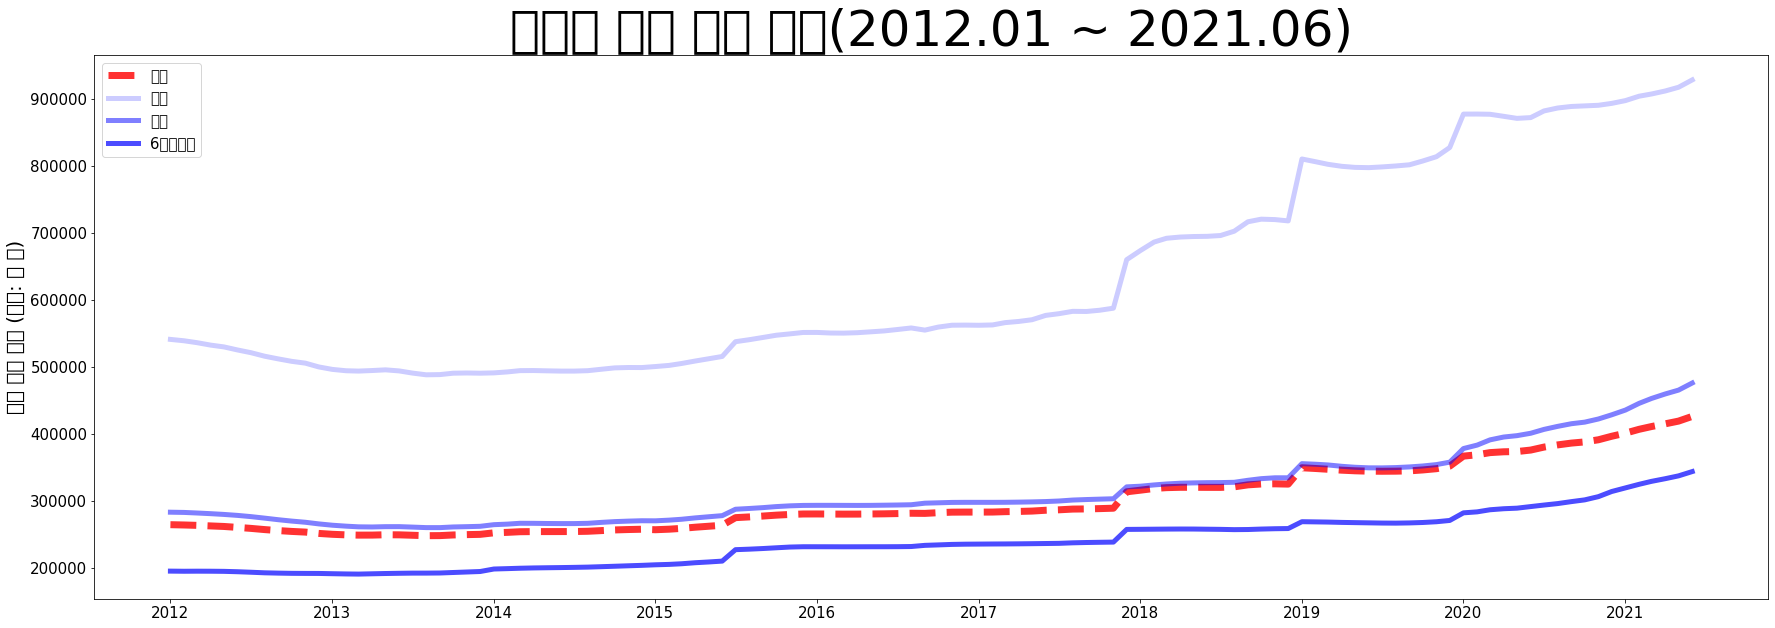

In [16]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.plot(df_w['전국'], linestyle='--', color="#FF3232", linewidth='7')
ax.plot(df_w['서울'], color="b", alpha=0.2, linewidth='5')
ax.plot(df_w['경기'], color="b", alpha=0.5, linewidth='5')
ax.plot(df_w['6대광역시'], color='b', alpha=0.7, linewidth='5')

ax.set_ylabel("평균 매매 가격 (단위: 천 원)", fontsize=20)



plt.title('아파트 매매 가격 동향(2012.01 ~ 2021.06)', fontsize=50)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(['전국', '서울', '경기', '6대광역시'], fontsize=15)

plt.show()